In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
dataset=pd.read_csv("preprocessed")

In [3]:
dataset

,Si.NO,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China


In [4]:

dataset.isnull().sum()

Si.NO                  0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
dtype: int64

In [5]:
dataset.drop("Si.NO", axis=1, inplace=True)

In [6]:
dataset.cov()

,Age,Years of Experience,Salary
Age,57.965330,36.995174,2.925947e+05
Years of Experience,36.995174,47.102533,2.058000e+05
Salary,292594.715463,205800.031676,2.794211e+09


In [7]:
#etest and mba_p covariant value is they have 16% difference 
#dgree and etest covariant value is they have 21% difference

In [8]:
dataset.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.708009,0.727031
Years of Experience,0.708009,1.000000,0.567275
Salary,0.727031,0.567275,1.000000


In [9]:
dataset

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA
4,52.0,Male,Master's,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China


In [10]:
import seaborn as sns

In [11]:
#!pip install statsmodels

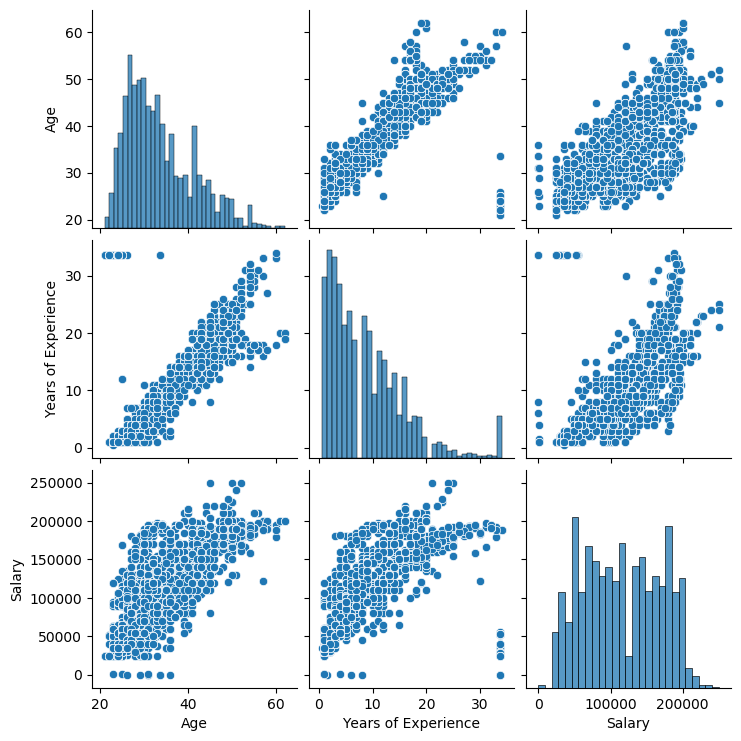

In [12]:
sns.pairplot(dataset)

In [13]:
#sepreated the QuanQual dataset
quan=[]
qual=[]
for columnsName in dataset.columns:
    if(dataset[columnsName].dtype=='O'):
        #print("qual")
        qual.append(columnsName)
    else:
        #print("quan")
        quan.append(columnsName)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [15]:
quan

['Age', 'Years of Experience', 'Salary']

In [16]:
calc_vif(dataset[quan])

,variables,VIF
0,Age,11.909288
1,Years of Experience,4.166926
2,Salary,11.710774


### Idependant sample-Unpired T Test
different group(Male,Female)butsame contion(Years of Experience)

In [17]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['Gender']=='Male']['Years of Experience']
female=dataset[dataset['Gender']=='Female']['Years of Experience']
ttest_ind(male, female)

Ttest_indResult(statistic=1.155396439476486, pvalue=0.24796940737006726)

### Dependant Sample
same group(male) but Different Condition(Years of Experience,Salary)

In [18]:
from scipy.stats import ttest_rel
dataset=dataset.dropna()
male=dataset[dataset['Gender']=='Male']['Years of Experience']
male1=dataset[dataset['Gender']=='Male']['Salary']
ttest_rel(male, male1)

Ttest_relResult(statistic=-141.00187859946695, pvalue=0.0)

In [19]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male=dataset[dataset['Education Level']=="Bachelor's"]['Salary']
female=dataset[dataset['Education Level']=='PhD']['Salary']
ttest_ind(male, female)

Ttest_indResult(statistic=-23.0443119224893, pvalue=4.694994553312445e-105)

# Hypothesis Testing 

# reject null hypothesis p<0.05
# Accept null hypothesis and reject alternate hypothesis

# ANAVO: Analysis of Variance

In [20]:
import scipy.stats as stats
stats.f_oneway(dataset['Age'],dataset['Years of Experience'],dataset['Salary'])

F_onewayResult(statistic=31851.44732602218, pvalue=0.0)

In [21]:
def get_pdf_probability(dataset):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    #Generate sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%3f',(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)    


C:\Users\Muthu K\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=%.3f, Standard Deviation=%3f (115240.97629837369, 52860.2945127616)


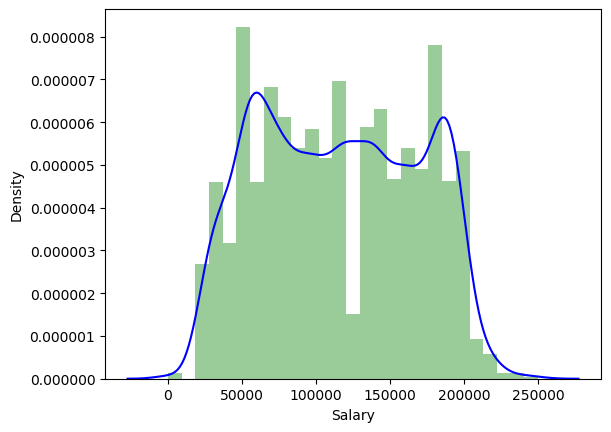

In [22]:
get_pdf_probability(dataset["Salary"])

In [23]:

def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #Generate sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%3f',(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probabilities for a range of outcomes
    value=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in value]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Users\Muthu K\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=%.3f, Standard Deviation=%3f (115240.97629837369, 52860.2945127616)
The area between range(200000,240000):0.04528469435058389


0.04528469435058389

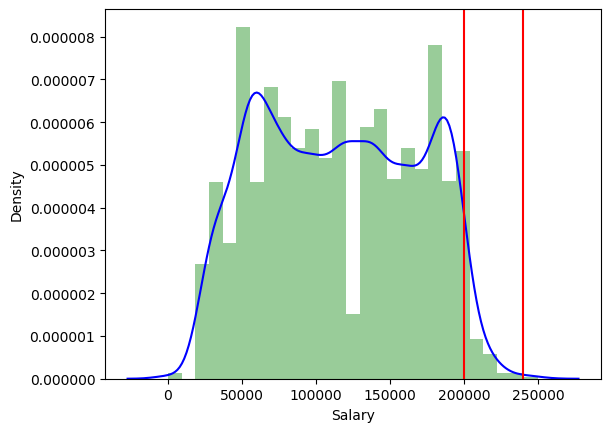

In [24]:
get_pdf_probability(dataset["Salary"],200000,240000)

In [25]:
def stdNBgraph(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std)for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\Muthu K\AppData\Local\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


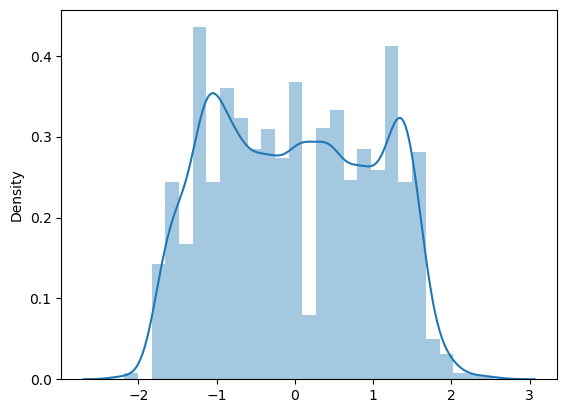

In [26]:
stdNBgraph(dataset["Salary"])

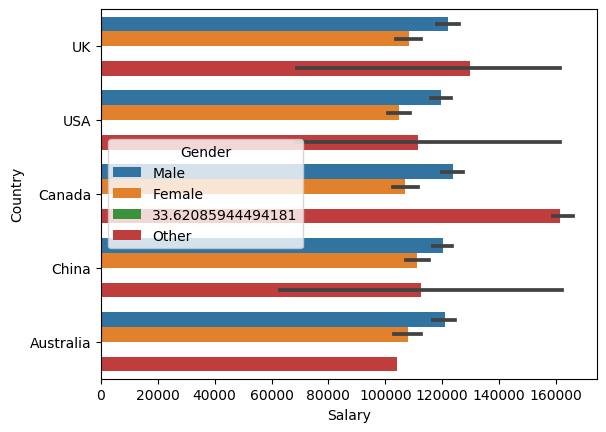

In [32]:
sb.barplot(x='Salary',y='Country',data=dataset,hue='Gender')
plt.show()

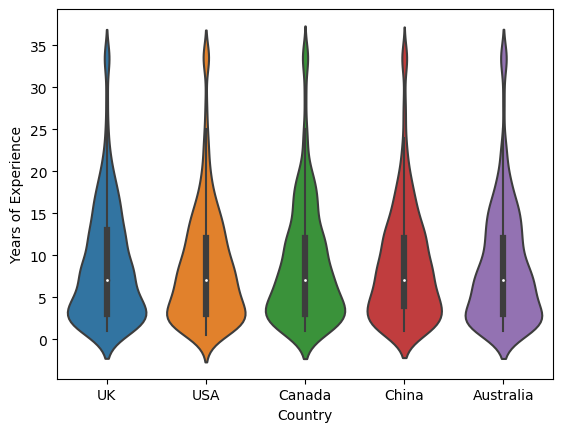

In [37]:
sb.violinplot(x='Country',y='Years of Experience',data=dataset)
plt.show()